In [270]:
# Import libraries
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [271]:
# Make the code device agnostic (meaning it could run on CPU or GPU if it's available)
if torch.cuda.is_available():
    device = "cuda" # Use NVIDIA GPU (if available)
elif torch.backends.mps.is_available():
    device = "mps" # Use Apple Silicon GPU (if available)
else:
    device = "cpu" # Default to CPU if no GPU is available

## Q1.  Create a straight line dataset using the linear regression formula (`weight * X + bias`).

-   Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
-   Split the data into 80% training, 20% testing.
-   Plot the training and testing data so it becomes visual.

## Solution to Q1

The Linear Regression line is given by the formula: `y = mx + b` where:

- y = independent variable

- x = dependent variable

- m = slope/gradient or weight

- b = y-intercept or bias

In [272]:
# Using the given parameters
weight = 0.3
bias = 0.9

# Create data
start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias



In [273]:
# The total number of data in both Independent and dependent variables
print(f"Number of datapoints (samples) in X: {len(X)}\n"
      f"Number of datapoints (samples) in y: {len(y)}.")

Number of datapoints (samples) in X: 100
Number of datapoints (samples) in y: 100.


In [274]:
print(f"First 10 samples in X\n{X[:10]}")

First 10 samples in X
tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])


In [275]:
print(f"First 10 datapoints in y\n{y[:10]}")

First 10 datapoints in y
tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [276]:
# Create train/test split
# 80% of above data will be used for the training set, and 20% for the test set
# len(X), len(y)
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"Number of datapoints (samples) in X_train:\t{len(X_train)}\n"
      f"Number of datapoints (samples) in y_train:\t{len(y_train)}\n"
      f"Number of datapoints (samples) in X_test:\t{len(X_test)}\n"
      f"Number of datapoints (samples) in y_test:\t{len(y_test)}")

Number of datapoints (samples) in X_train:	80
Number of datapoints (samples) in y_train:	80
Number of datapoints (samples) in X_test:	20
Number of datapoints (samples) in y_test:	20


In [277]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

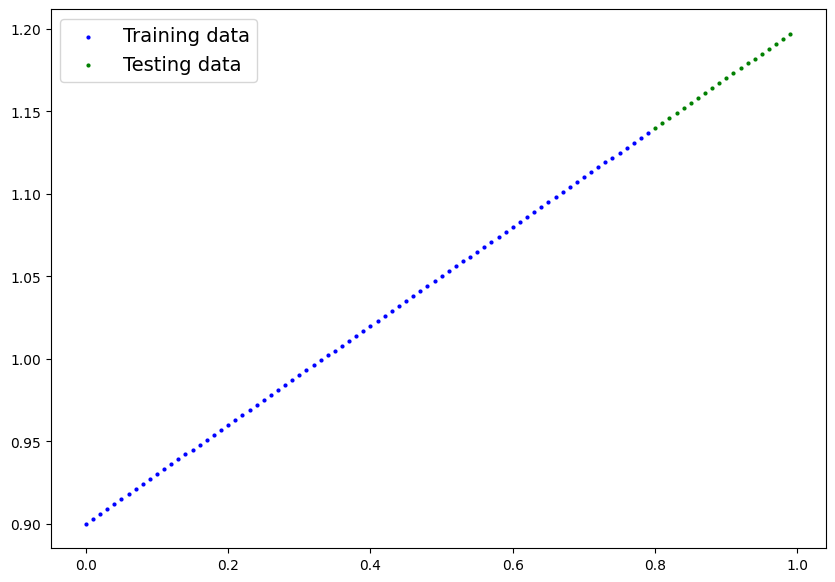

In [278]:
plot_predictions()

## Q2.  Build a PyTorch model by subclassing `nn.Module`.

-   Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
-   Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
-   Once you've constructed the model, make an instance of it and check its `state_dict()`.
-   **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [279]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(data = torch.randn(1, # <- start with random weight of 1 (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch uses float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias of 1 (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch uses float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the Linear Regression model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [280]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_1 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [281]:
for i in model_1.parameters():
  print(f"{i}")

Parameter containing:
tensor([0.3367], requires_grad=True)
Parameter containing:
tensor([0.1288], requires_grad=True)


In [282]:
# List named parameters
model_1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [283]:
# Put the model to the target device and check its parameters
# model_1_device = model_1.to(device)
# list(model_1_device.parameters())
list(model_1.to(device).parameters())

[Parameter containing:
 tensor([0.3367], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.1288], device='cuda:0', requires_grad=True)]

In [284]:
# Check the device with the below code, if the all the parameters in the model are on the same device
next(model_1.parameters()).device

device(type='cuda', index=0)

## Q3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

- Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.

- Write a training loop to perform the appropriate training steps for 300 epochs.

- The training loop should test the model on the test dataset every 20 epochs.

In [285]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [286]:
torch.manual_seed(42)

# Set the number of epochs to 300 (how many times the model will pass over the training data)
epochs = 300

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

# Move the data to the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# Move the model to the target device
model_1 = model_1.to(device)

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_1.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_1(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards (Backpropagation)
    loss.backward()

    # 5. Progress/Step the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_1.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_1(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Test the model on the test dataset every 20 epochs and Print out what's happening
      if epoch % 20 == 0:
            epoch_count.append(epoch)
            # Move loss to CPU before converting to NumPy
            train_loss_values.append(loss.cpu().detach().numpy())
            # Move test_loss to CPU before converting to NumPy
            test_loss_values.append(test_loss.cpu().detach().numpy())
            print(f"{'Epoch:':=^40}\nEpoch:{epoch}\nMAE Train Loss: {loss:.3f} \nMAE Test Loss: {test_loss:.3f}\n")

=================Epoch:=================
Epoch:0
MAE Train Loss: 0.757 
MAE Test Loss: 0.725

=================Epoch:=================
Epoch:20
MAE Train Loss: 0.525 
MAE Test Loss: 0.454

=================Epoch:=================
Epoch:40
MAE Train Loss: 0.294 
MAE Test Loss: 0.183

=================Epoch:=================
Epoch:60
MAE Train Loss: 0.077 
MAE Test Loss: 0.073

=================Epoch:=================
Epoch:80
MAE Train Loss: 0.053 
MAE Test Loss: 0.116

=================Epoch:=================
Epoch:100
MAE Train Loss: 0.046 
MAE Test Loss: 0.105

=================Epoch:=================
Epoch:120
MAE Train Loss: 0.039 
MAE Test Loss: 0.089

=================Epoch:=================
Epoch:140
MAE Train Loss: 0.032 
MAE Test Loss: 0.074

=================Epoch:=================
Epoch:160
MAE Train Loss: 0.025 
MAE Test Loss: 0.058

=================Epoch:=================
Epoch:180
MAE Train Loss: 0.018 
MAE Test Loss: 0.042

=================Epoch:=================
Epoch

## Q4. Make predictions with the trained model on the test data.

- Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

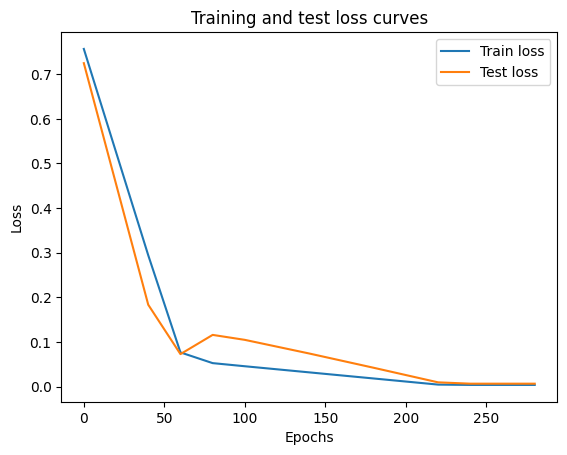

In [287]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [288]:
# 1. Set the model in evaluation mode
model_1.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we have setup device-agnostic code
  # model_1.to(device)
  # X_test = X_test.to(device)
  # Move predictions to CPU before plotting
  y_preds = y_preds.cpu() # Add this line to move data to CPU
  y_preds = model_1(X_test)

y_preds

tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]], device='cuda:0')

In [289]:
# Check the predictions on the CPU also
y_preds.cpu()

tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]])

In [290]:
# Check the predictions on GPU
y_preds.cuda()

tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]], device='cuda:0')

In [291]:
# By replacing cpu with torch.device('cpu'),
# you explicitly tell PyTorch to move the tensor to the CPU device.
# This will resolve any NameError and allow the comparison to proceed correctly.
y_preds.cpu() == y_preds.cuda().to(torch.device('cpu'))

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

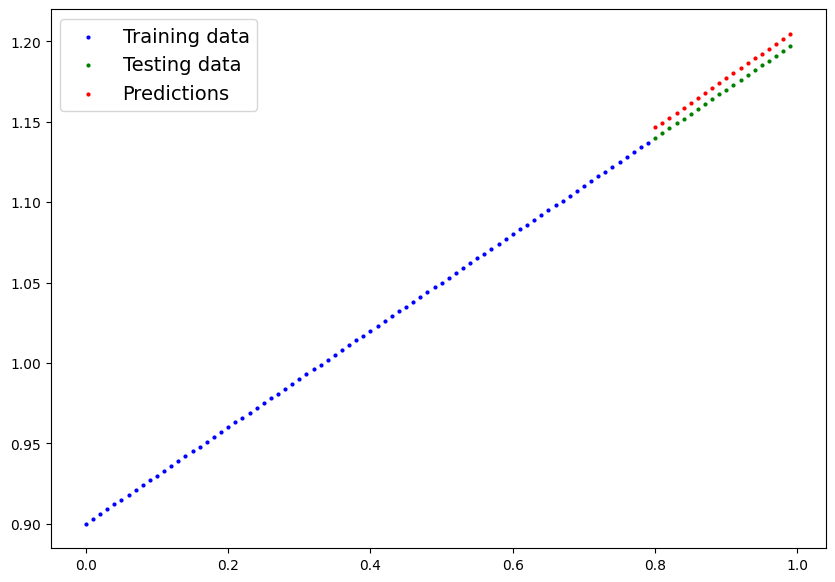

In [292]:
# DOn't forget to move the y_preds to the cpu before using any plotting libraries
plot_predictions(predictions=y_preds.to(torch.device('cpu')))

## Q5. Save your trained model's state_dict() to file.

- Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.

- Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [293]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_model_2"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_model_2


In [294]:
# Check the saved file path
!ls -l models/

total 4
-rw-r--r-- 1 root root 1562 Feb  1 09:19 01_pytorch_model_2


In [295]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
# Create a new instance of the model
model_2 = LinearRegressionModel()


# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# # Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
# loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))



<ipython-input-295-70f0015961b5>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [296]:
# # Save the newly loaded model to the device
# loaded_model_2.to(device)

In [297]:
# Make Predictions with the loaded model
# 1. Set the model in evaluation mode
loaded_model_2.eval()

# Move the model to the target device (GPU if available)
loaded_model_2.to(device)

# Move the test data to the target device (GPU if available)
X_test = X_test.to(device)

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  y_preds_loaded = loaded_model_2(X_test)

# Move predictions back to CPU if needed (e.g., for plotting with matplotlib)
y_preds_loaded = y_preds.cpu()

y_preds_loaded

tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]])

In [298]:
# Compare the new predictions to the old one
y_preds.to(torch.device('cpu')) == y_preds_loaded

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [299]:
# Check the state dict of the newly created loaded model
loaded_model_2.state_dict()

OrderedDict([('weights', tensor([0.3067], device='cuda:0')),
             ('bias', tensor([0.9011], device='cuda:0'))])